# Week 11 Quiz

## Weichen Li - wl2726

### Due Sun May 3, 11:59pm

In this quiz, we're going to gather some financial data from an external source perform a few time series tranformations with visualizations.

### Setup Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Gather Data

In [2]:
# The pandas_datareader package provides access to many different data api's 
#   includeing financial sources such as yahoo and quandl as well as economic data from the World Bank.
# For more info see: https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
# 
# Prior to importing the package we need to install it using conda.
# At the command line, run:
#   conda install -n eods-s20 pandas-datareader
#
# Note that name of the package at install is 'pandas-datareader' with a hyphen,
#   while the package name at import is 'pandas_datareader' with an underscore.

# From pandas_datareader import the data module
from pandas_datareader import data

# We're going to load daily stock price information for Tesla which has the ticker symbol 'TSLA'.
# We only want to look at stock prices for the year 2019.
# We'll do this using the data.DataReader object.
# The first positional argument to data.DataReader is the name of the data we're looking for.
#    In this case it is the string 'TSLA'.
# We also need to specify:
#    start='2019',
#    end='2020',
#    data_source='yahoo'
# The datastructure returned by DataReader is a dataframe.
# Store this result as df
df=data.DataReader('TSLA',start='2019',end='2020',data_source='yahoo')

# Print the info for df and note the range of the index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-01-02 to 2019-12-31
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


## Plot Closing Price

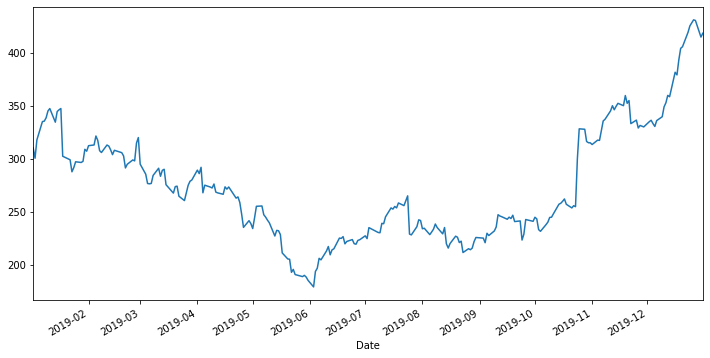

In [3]:
# The Closing price of a stock is the price of that stock at the close of the trading day. 
# The Adjusted Closing price factors in things such as dividends and stock splits.
# For this period, these prices are the same, so we'll just use Close.

# Plot the Close column in a figure of size (12,6)
df.Close.plot(figsize=(12,6))

## Calculate and Plot Percentage Change of Closing

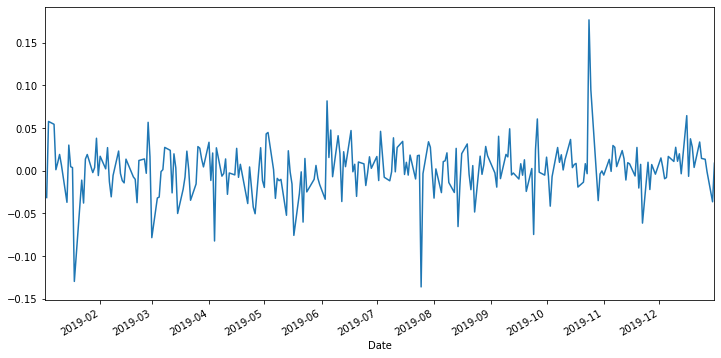

In [4]:
# There appear to be some dramatic shifts in price in this time period.
# Calculate the percentage change and store in df as a new column Close_pctchange

# Plot Close_pctchange in a figure of size (12,6)
Close_pctchange=(df.Close / df.Close.shift(1) - 1)
Close_pctchange.plot(figsize=(12,6))

## Zoom In On October

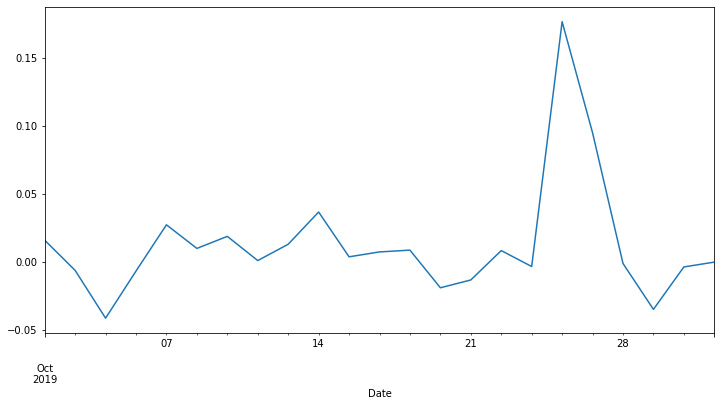

In [5]:
# There should be a big positive spike toward the end of October.
# Let's zoom in on this range.

# Create a new plot Close_pctchange of only the data points in Oct (Hint: use loc and 2019-10)
Close_pctchange.loc['2019-10'].plot(figsize=(12,6))

In [6]:
# We can use the idxmax() function to print the index corresponding to the max value in a series.
# Use idxmax to print the date corresponding to the maximum Close_pctchange.
# This corresponds to the date after which Telsa made a very large profit announcement.
Close_pctchange.idxmax()

Timestamp('2019-10-24 00:00:00')

## Summarize Data Using Rolling Window

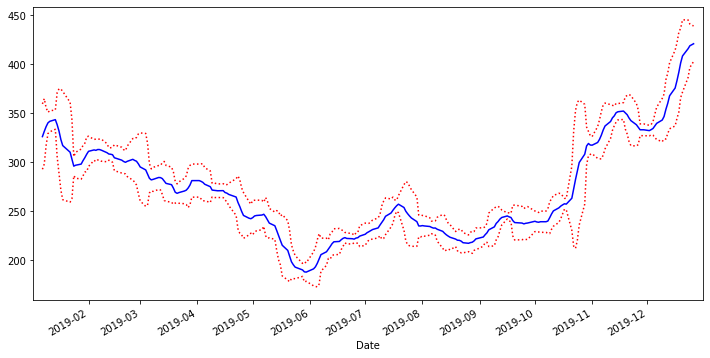

In [7]:
# Here we'll create a plot that smooths the Close data over time
#    as well as showing volatility, using a rolling window.

# First create a rolling window object on df.Close of size 7, center=True.
# Store in rolling
rolling = df.Close.rolling(7, center=True)

# Create fig,ax using subplots with figure size of (12,6)
fig,ax = plt.subplots(1,1,figsize=(12,6))

# On ax, plot the rolling mean.
#   Set the color to blue with c='b'
rolling.mean().plot(c='b')

# On ax, plot the rolling mean + 2 standard deviations. 
#   Set the color to red with c='r'
#   And the linestyle to dots with ls=':'
(rolling.mean() + 2*rolling.std()).plot(ls=':',c='r')

# On ax, plot the rolling mean - 2 standard deviations. 
#   Set the color to red with c='r'
#   And the linestyle to dots with ls=':'
(rolling.mean() - 2*rolling.std()).plot(ls=':',c='r')